## 라이브러리 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#시각화 관련 한글 깨짐 방지용 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

import koreanize_matplotlib

from IPython.display import set_matplotlib_formats
plt.rc('font',family='NanumGothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (29.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

# 데이터셋 로드

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [ ]:
df.shape

(2772, 5)

In [ ]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


## Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!
 
 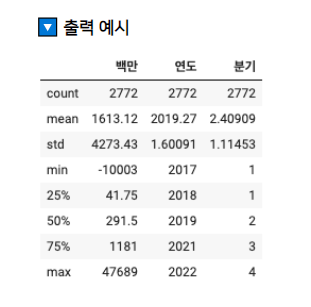

In [5]:
# '데이터' 컬럼 '백만'으로 이름 바꾸기
df.rename(columns={'데이터':'백만'}, inplace = True)
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [6]:
# 시점에서 추출하여 연도 컬럼 추가하기
df["연도"] = df["시점"].map(lambda x: int(x.split(".")[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [7]:
# 연도와 같이 분기 컬럼 추가하기
df["분기"] = df["시점"].map(lambda x: int(x.split(".")[1].split("/")[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [ ]:
# 백만, 연도, 분기 컬럼의 데이터 type 확인하기!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [8]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


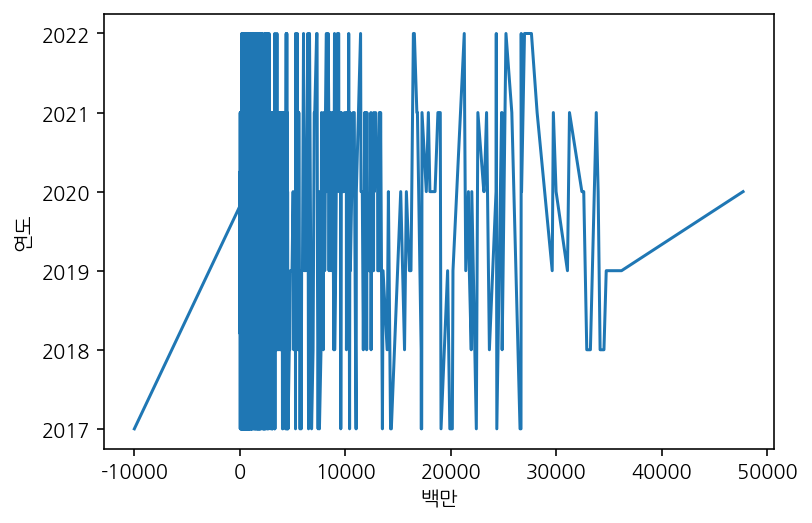

In [17]:
sns.lineplot(data=df, x='백만', y='연도', ci=None)

#### 위의 기술통계값을 통해서 알 수 있는 것
* 세 컬럼의 count 값이 같기 때문에 결측치가 없음을 알 수 있다. 
* 연도의 최솟값이 2017, 최댓값이 2022이므로 2017년부터 2022년까지의 데이터가 기술되어 있음을 확인할 수 있다.
* '백만'의 최솟값이 -10003이 나왔는데 이는 이상치로 볼 수 있다. 
* 표준편차가 4273으로 평균을 중심으로 납작한 모양의 그래프가 그려질 것을 예측할 수 있다.

## Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

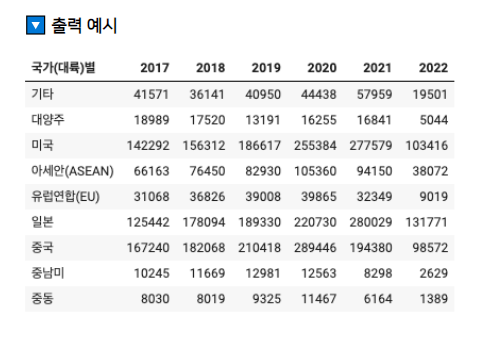

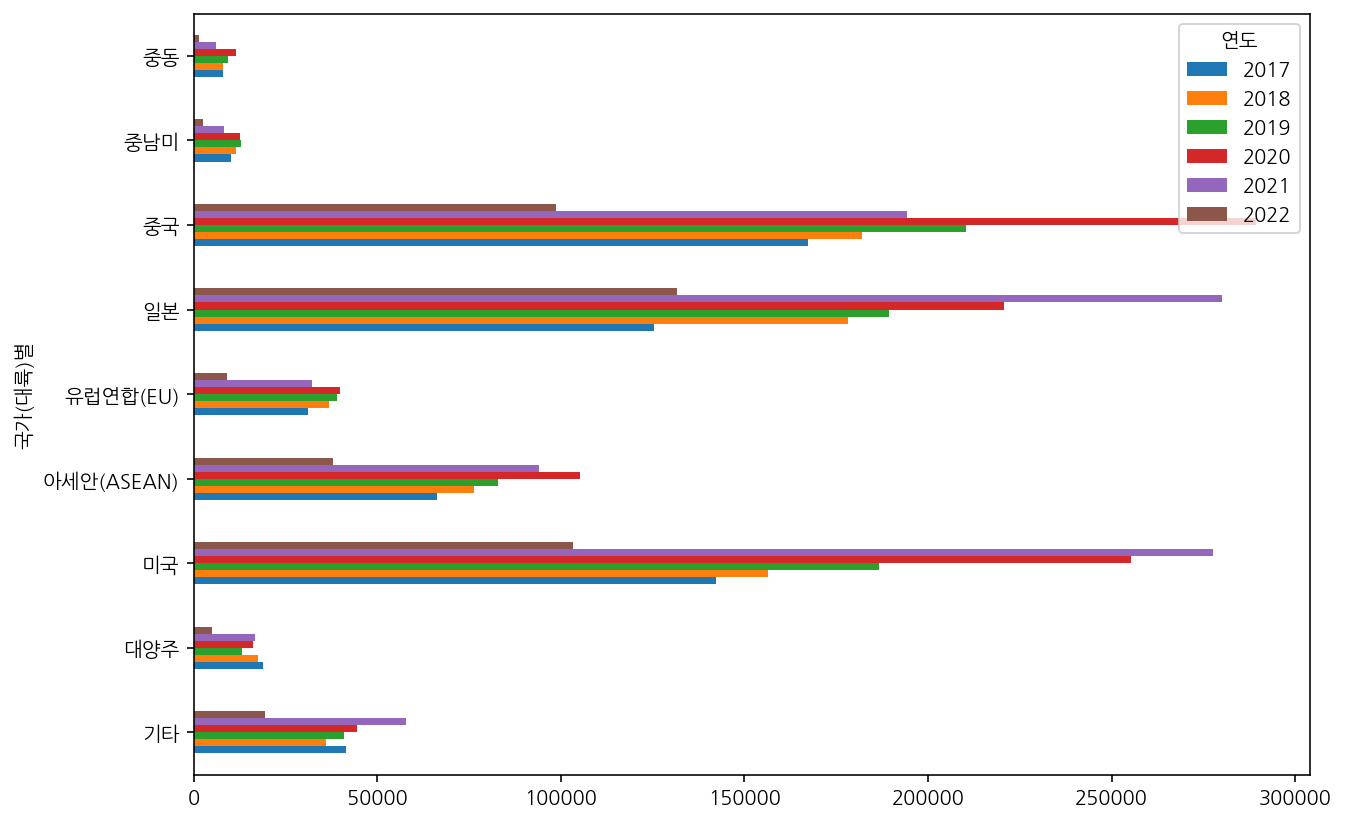

In [20]:
df_country = df.pivot_table(index = '국가(대륙)별', columns='연도', values='백만', aggfunc="sum")
df_country.plot.barh(figsize=(10,7))

* 중국, 일본, 미국이 top 3인 것이 눈에 잘 들어온다. 
* 코로나가 한창이었던 2020년 중국 판매액이 전체 기간 중 최고치를 기록했다.
* 하지만, 2021년 중국의 온라인 판매액은 전년도에 비해 감소하게 된다. 이는 코로나 초기 발생지로 알려진 중국이 바이러스에 큰 영향을 받아 2020년도에는 온라인 소비가 급증적으로 증가하게 되며 나타난 결과일 것으로 예측할 수 있다. 2021년도 중국 정부가 발표한 확진자 수는 다른 나라에 비해 현저히 낮은 수치를 기록했었다. 그로 인해서, 오프라인 활동이 늘어난 것도 영향을 끼쳤을 것으로 추측.
* 그에 반해, 일본, 미국은 2021년 온라인 판매액이 더 증가하였다. 2021년도 유행 확산이 심해지고 온라인 소비에 적응하여 이런 결과가 나왔을 것이라고 추측.

## Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!

* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [10]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만', '연도', '분기'], dtype='object')

In [ ]:
df['판매유형별'].unique()

array(['면세점 이외'], dtype=object)

In [11]:
df_2020 = df[df['연도']==2020].copy()
df_2020

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [28]:
df_2020_product = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
df_2020_product

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


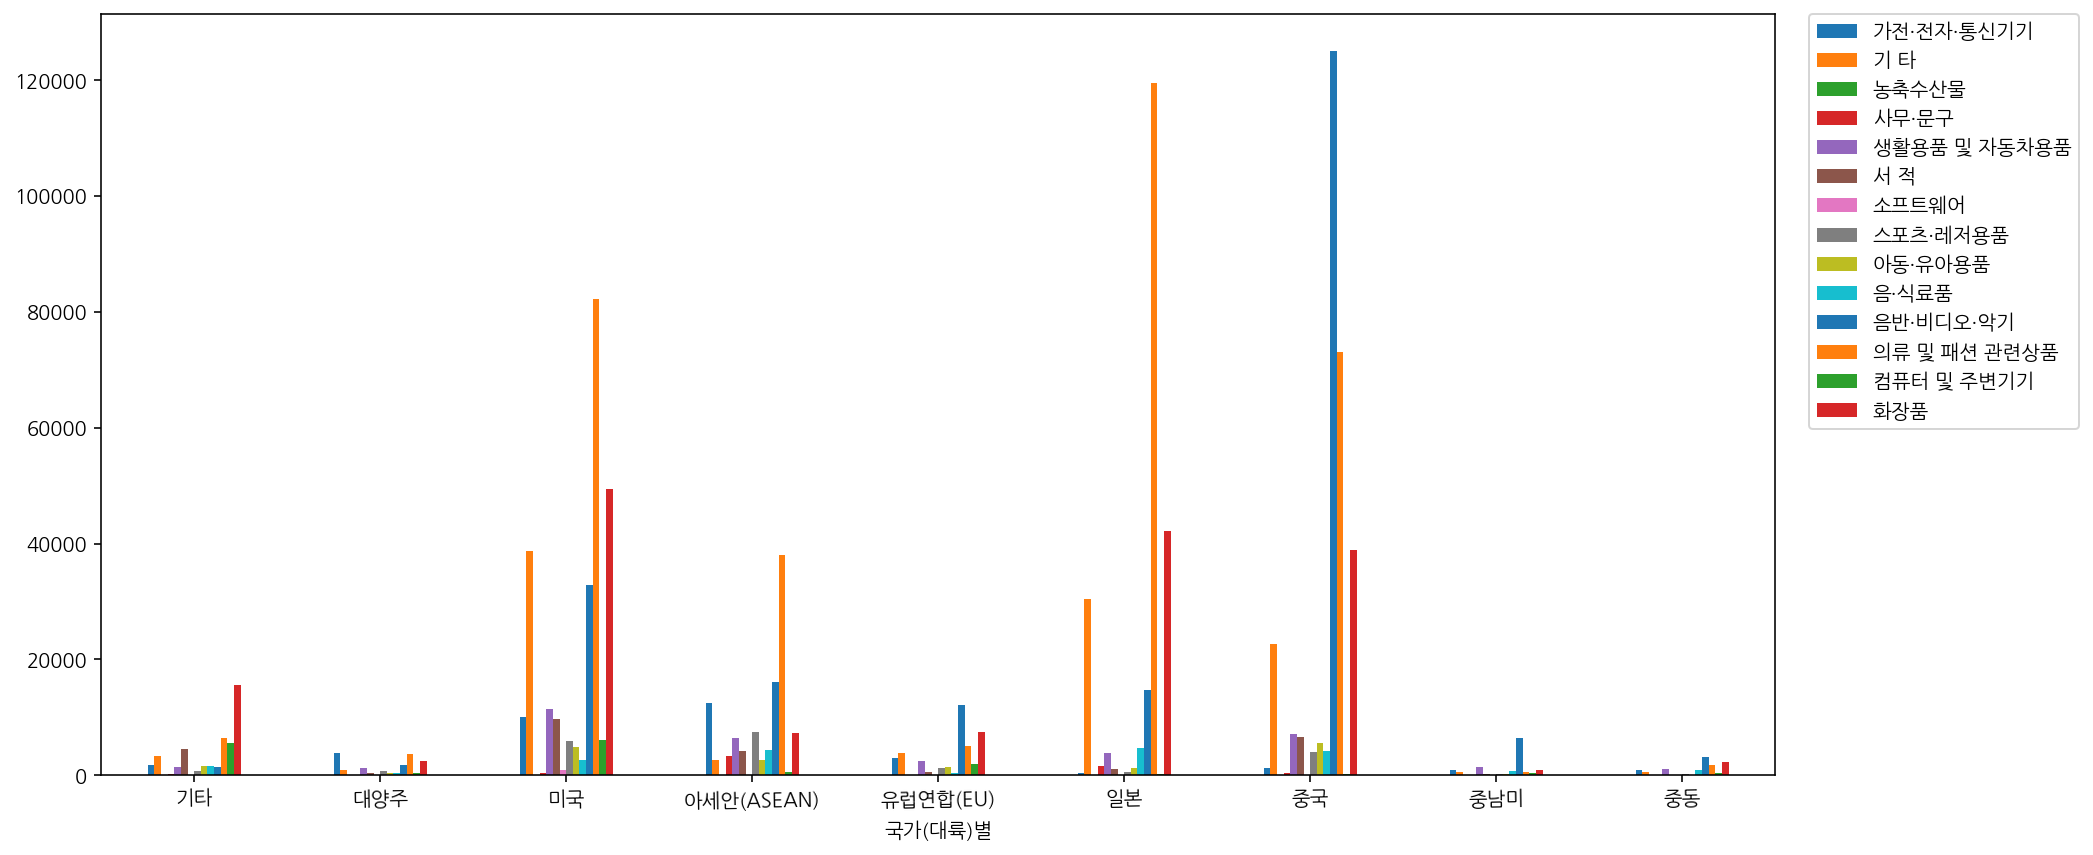

In [29]:
df_2020_product.plot.bar(rot=1, figsize=(15,7))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 그래프 밖에 주석 표시하기

* 2020년도 중국에서는 음반 비디오 악기가 제일 높은 판매량을 기록했다. 코로나로 인한 격리 생활 중에 K-POP으로 위로를 얻었던 것일까...?
* 일본, 미국에서는 의류 및 패션 관련상품이 제일 판매량이 많았다. 
* 전체적으로, 예상하지 못한 결과가 나왔다. 우선, 대부분의 국가(대륙)에서 가전 전자 통신기기의 비중이 제일 높을 것이라고 예상했지만 전혀 아니었다. 오히려, 코로나로 인해 큰 반시이익을 얻지 못할 것이라고 생각했던 음반 비디오 악기, 의류 및 패션 관련상품의 판매액이 제일 높게 위치했다. 이것이 의미하는 바가 무엇일지는 기사나 다른 데이터들을 통해서 파악하면 좋을 것 같다. 

## Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.
* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

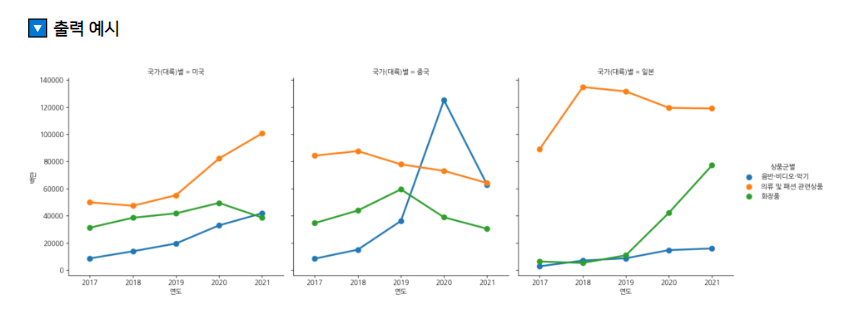

In [13]:
df['상품군별'].unique()

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구', '음반·비디오·악기',
       '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품 및 자동차용품', '기 타'], dtype=object)

In [14]:
df_sub = df[(df['연도']!=2022) & ((df['국가(대륙)별'] == '미국') |(df['국가(대륙)별'] =="중국") |(df['국가(대륙)별'] == "일본")) & ((df['상품군별']=='음반·비디오·악기') | (df['상품군별'] == "화장품") | (df['상품군별'] == "의류 및 패션 관련상품"))].copy()
print(df_sub['국가(대륙)별'].unique())
print(df_sub['연도'].unique())
df_sub['상품군별'].unique()

['미국' '중국' '일본']
[2017 2018 2019 2020 2021]


array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

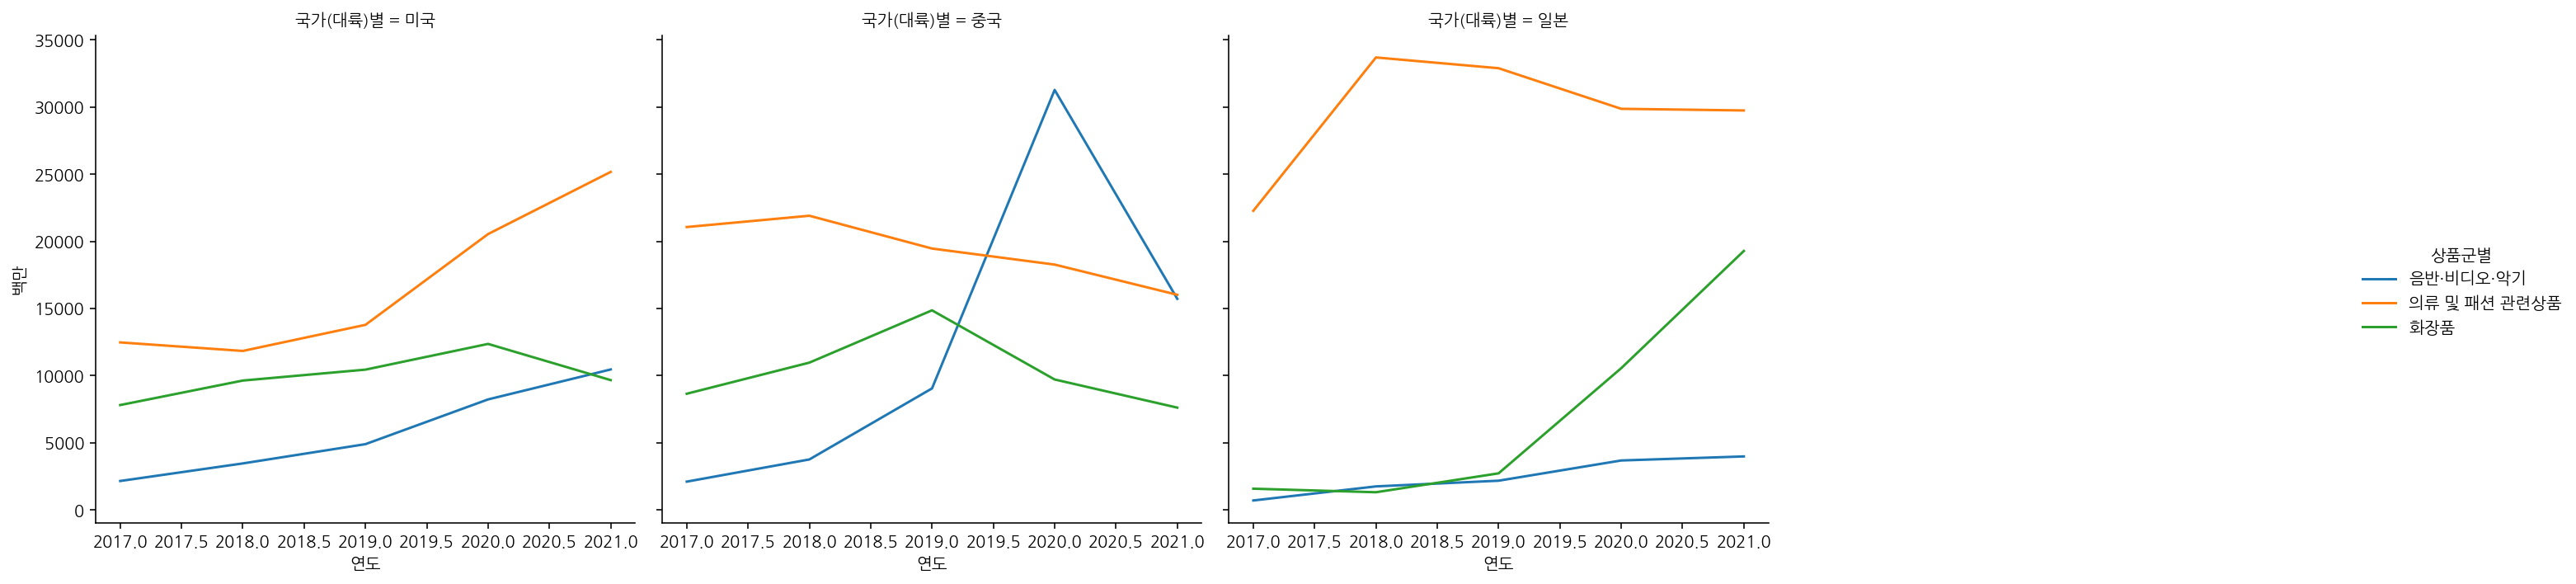

In [15]:
sns.relplot(data=df_sub, x='연도', y='백만', hue='상품군별', kind='line', col='국가(대륙)별', col_wrap = 4, ci=None)

* 중국의 음반 비디오 악기는 2020년도에 급격히 증가했다 다시 감소하는 추세를 보인다.
* 일본에서는 의류 및 패션 관련상품이 꾸준히 상위권을 유지하고 있으며, 화장품이 2019년 이후 증가하고 있다. 
* 미국은 의류 및 패션 관련상품, 음반 비디오 악기는 증가하는 추세지만, 화장품은 완만한 증가 후 하락하는 추세이다. 

## Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!
* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

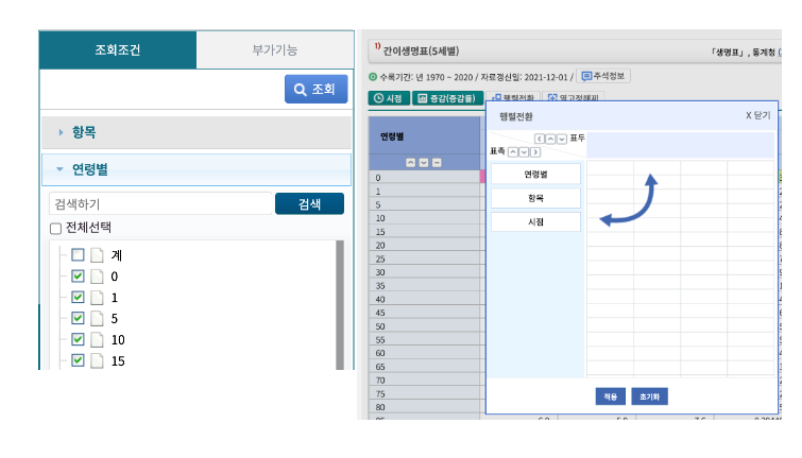

#### 시간 관계 상 5번 문제까지 해결하지 못했습니다ㅜㅜ